Loading Data...
Data Loaded.
--- Running Baseline ---
Config: Opt=ADAM, Aug=False, Sch=False, Device=cuda
Epoch 1/30 | Loss: 1.2491 | Test Acc: 61.06%
Epoch 2/30 | Loss: 0.7869 | Test Acc: 71.19%
Epoch 3/30 | Loss: 0.6161 | Test Acc: 79.46%
Epoch 4/30 | Loss: 0.5008 | Test Acc: 80.56%
Epoch 5/30 | Loss: 0.4122 | Test Acc: 81.31%
Epoch 6/30 | Loss: 0.3374 | Test Acc: 79.80%
Epoch 7/30 | Loss: 0.2729 | Test Acc: 80.75%
Epoch 8/30 | Loss: 0.2230 | Test Acc: 81.95%
Epoch 9/30 | Loss: 0.1755 | Test Acc: 83.95%
Epoch 10/30 | Loss: 0.1502 | Test Acc: 82.25%
Epoch 11/30 | Loss: 0.1208 | Test Acc: 84.71%
Epoch 12/30 | Loss: 0.0998 | Test Acc: 83.40%
Epoch 13/30 | Loss: 0.0883 | Test Acc: 84.64%
Epoch 14/30 | Loss: 0.0760 | Test Acc: 83.63%
Epoch 15/30 | Loss: 0.0699 | Test Acc: 83.06%
Epoch 16/30 | Loss: 0.0615 | Test Acc: 84.19%
Epoch 17/30 | Loss: 0.0607 | Test Acc: 84.28%
Epoch 18/30 | Loss: 0.0542 | Test Acc: 83.28%
Epoch 19/30 | Loss: 0.0489 | Test Acc: 84.52%
Epoch 20/30 | Loss: 0.0474 | 

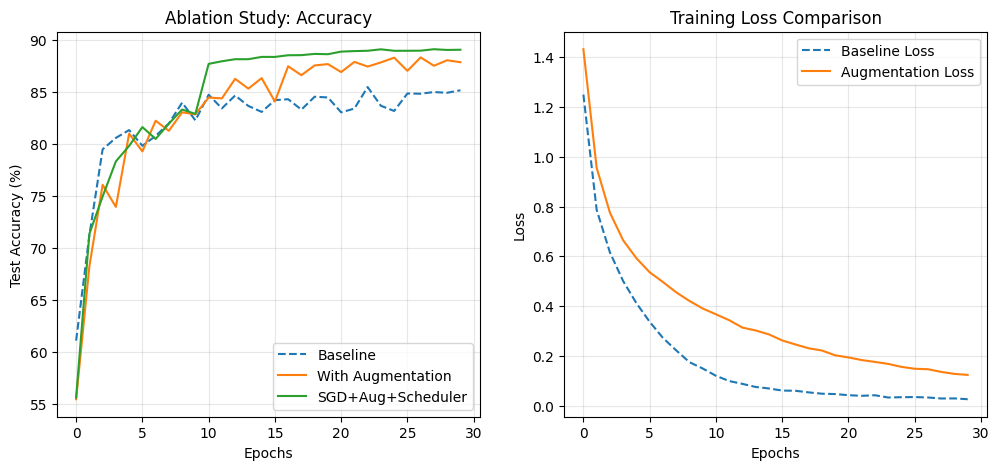

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from cnn_train import train


BATCH_SIZE = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

print("Loading Data...")
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)
print("Data Loaded.")

print("--- Running Baseline ---")
loss_base, acc_base = train(learning_rate=0.001, max_epochs=30, optimizer_type='ADAM', 
                            use_augmentation=False, use_scheduler=False)

print("\n--- Running with Augmentation ---")
loss_aug, acc_aug = train(learning_rate=0.001, max_epochs=30, optimizer_type='ADAM', 
                          use_augmentation=True, use_scheduler=False)

print("\n--- Running SGD + Aug + Scheduler ---")
loss_full, acc_full = train(learning_rate=0.01, max_epochs=30, optimizer_type='SGD', 
                            use_augmentation=True, use_scheduler=True)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(acc_base, label='Baseline', linestyle='--')
plt.plot(acc_aug, label='With Augmentation')
plt.plot(acc_full, label='SGD+Aug+Scheduler')
plt.title('Ablation Study: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(loss_base, label='Baseline Loss', linestyle='--')
plt.plot(loss_aug, label='Augmentation Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()